In [30]:
import pandas as pd
import datetime as dt
import seaborn as sb
from sklearn.linear_model import LinearRegression

# cleaning the data
df = pd.read_csv('epa-sea-level.csv', parse_dates = ['Year'])
df.drop(['Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level'], inplace=True, axis = 'columns')
df.rename({'CSIRO Adjusted Sea Level':'sea-level'}, inplace=True, axis = 'columns')
df.dropna(inplace=True)
df['Year'] = df['Year'].dt.year
df

,Year,sea-level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


<AxesSubplot:xlabel='Year', ylabel='sea-level'>

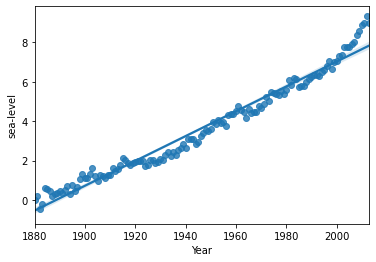

In [31]:
sb.regplot(x = 'Year', y = 'sea-level', data = df)

In [35]:
X = df['Year'].values.reshape(-1, 1)
y = df['sea-level'].values.reshape(-1, 1)
model = LinearRegression().fit(X,y)
r_sq = model.score(X,y)
print(model.intercept_)
print(model.coef_)
print(r_sq)

[-119.06594197]
[[0.06304458]]
0.9697466074149554


In [37]:
pred = model.predict([[2050]])
pred

array([[10.17545526]])